# 이코테 chapter 13 DFS/BFS 문제
# 백준 18351.특정 거리의 도시 찾기
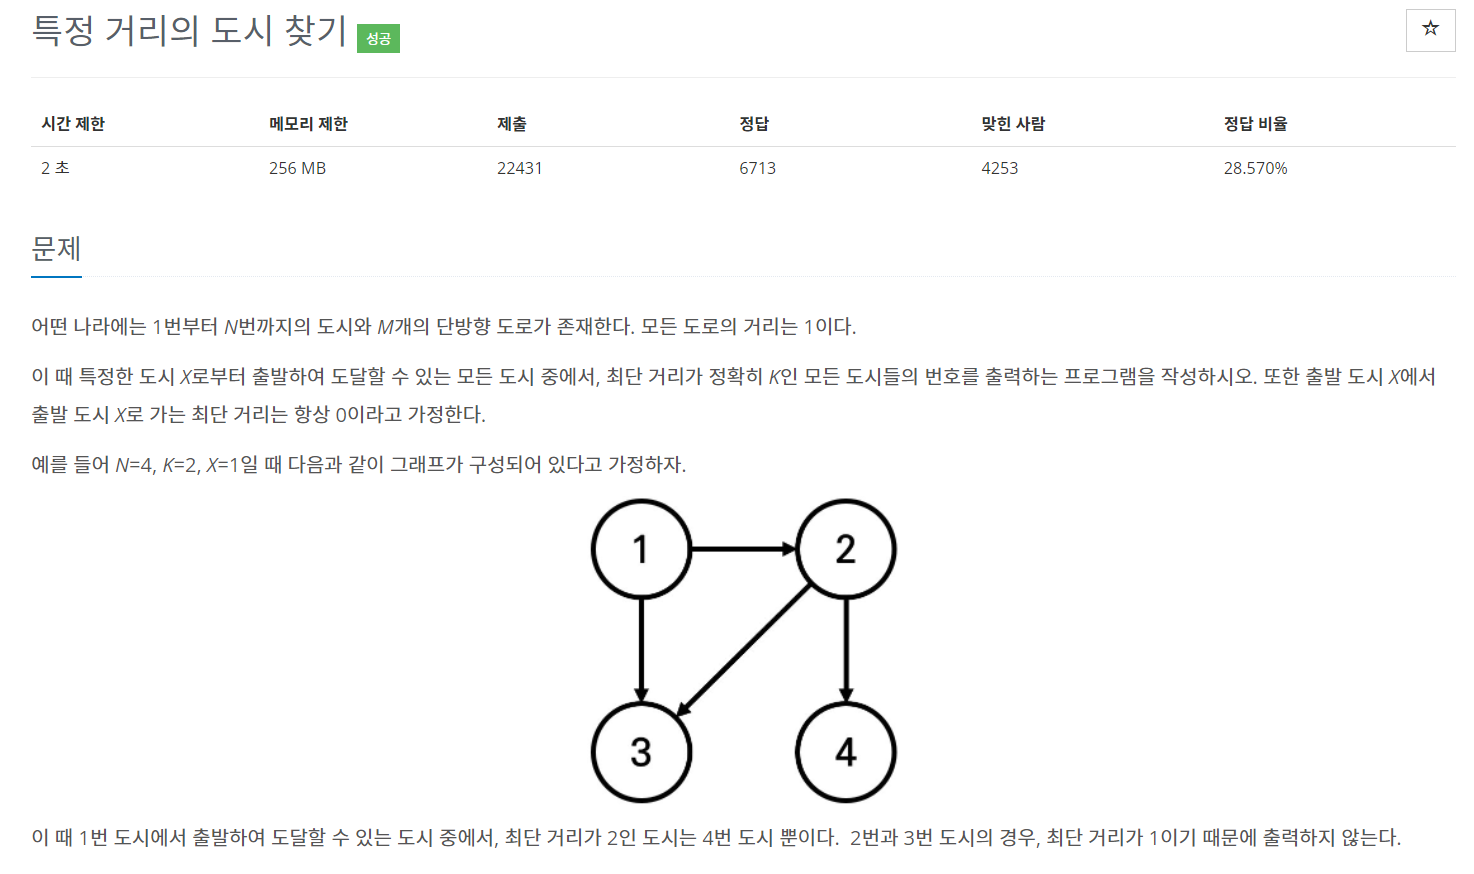
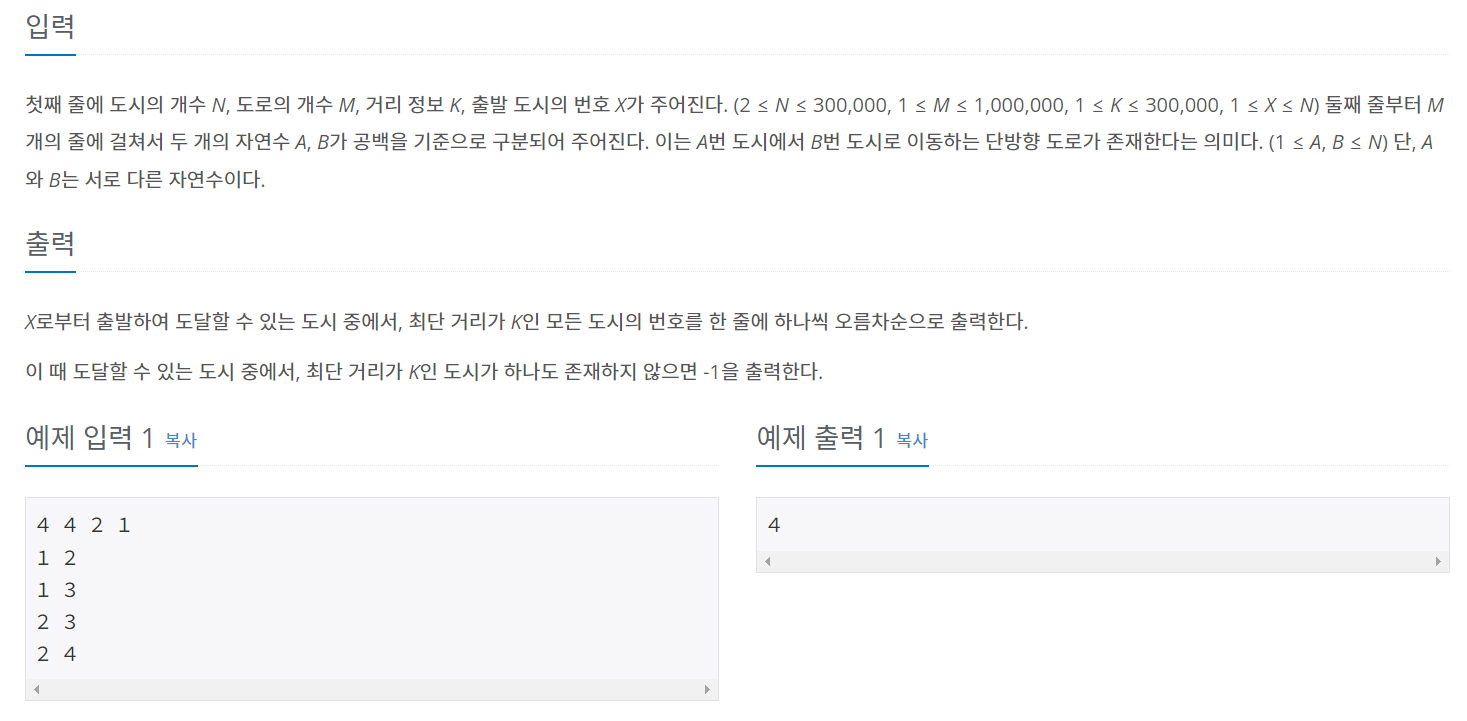
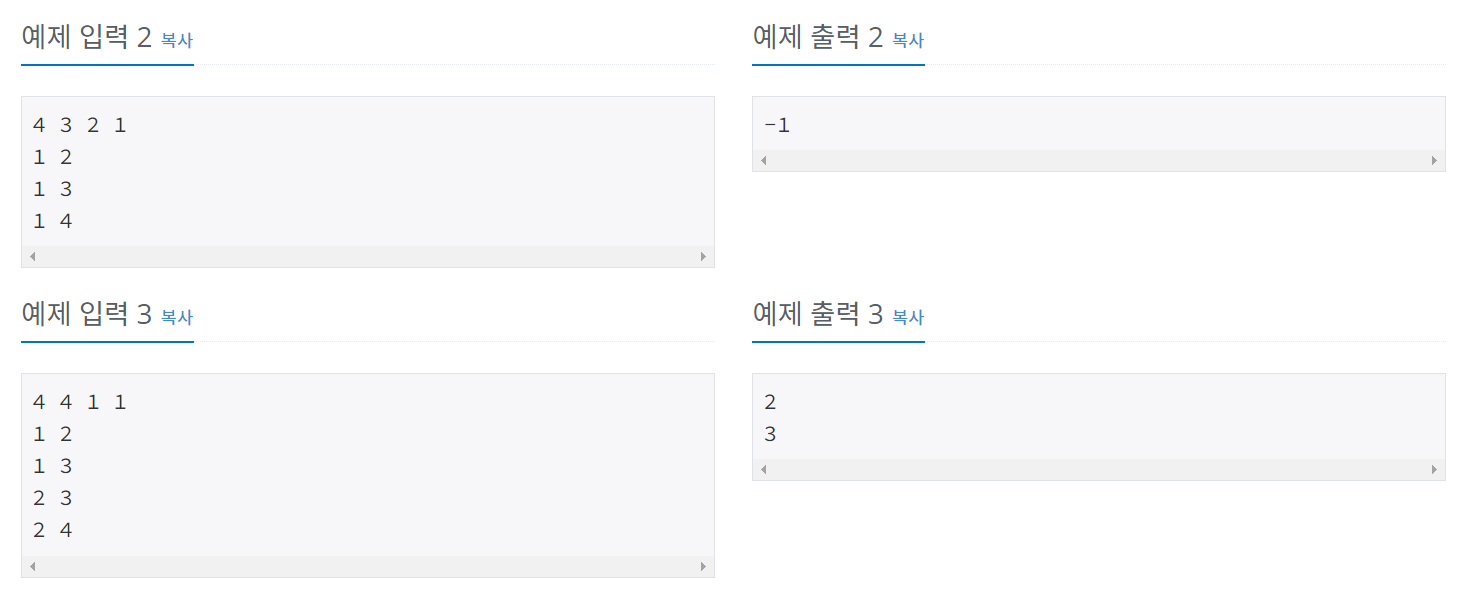

- `핵심 포인트`:
    - `노드 체크`: 그래프에 연결된 노드을 모두 방문하는 방법 코드로 구현
    - 어떻게?: 연결된 노드에 대한 재귀함수를 호출한다.
    - > ```python
    for i in graph[v]:
        dfs(graph, i, visited)
    ```

## 백준에서 실패1: DFS 이용한 풀이
### test case 1

In [1]:
# n: 도시의 개수, m: 도로의 개수, k: 거리 정보, x: 출발 도시 번호
n, m, k, x = map(int, input().split())
# n개가 아닌 0번 노드에 빈 리스트 설정해줘야하니까
graph = [[] for i in range(n+1)]
visited = [0]*(n+1)


# 첫 번째 수를 index로 잡아줘야겠다
for _ in range(m):
    start, end = map(int, input().split())
    graph[start].append(end)
print(graph)    


def dfs(graph, v, visited):
    visited[v] += 1
    for i in graph[v]:
        print(f'visited[v]:{i}, {visited[v]}, visited:{visited}')
        dfs(graph, i, visited)
        
            
dfs(graph, x, visited)
print(visited)

# 출력 부분
for idx in range(n):
    if visited[idx] == k:
        print(idx+1)
if k not in visited:
    print(-1)

4 4 2 1
1 2
1 3
2 3
2 4
[[], [2, 3], [3, 4], [], []]
visited[v]:2, 1, visited:[0, 1, 0, 0, 0]
visited[v]:3, 1, visited:[0, 1, 1, 0, 0]
visited[v]:4, 1, visited:[0, 1, 1, 1, 0]
visited[v]:3, 1, visited:[0, 1, 1, 1, 1]
[0, 1, 1, 2, 1]
4


### test case 2

In [2]:
# n: 도시의 개수, m: 도로의 개수, k: 거리 정보, x: 출발 도시 번호
n, m, k, x = map(int, input().split())
# n개가 아닌 0번 노드에 빈 리스트 설정해줘야하니까
graph = [[] for i in range(n+1)]
visited = [0]*(n+1)


# 첫 번째 수를 index로 잡아줘야겠다
for _ in range(m):
    start, end = map(int, input().split())
    graph[start].append(end)
print(graph)    


def dfs(graph, v, visited):
    visited[v] += 1
    for i in graph[v]:
        print(f'visited[v]:{i}, {visited[v]}, visited:{visited}')
        dfs(graph, i, visited)
            
dfs(graph, x, visited)
print(visited)

# 출력 부분
for idx in range(n):
    if visited[idx] == k:
        print(idx+1)
if k not in visited:
    print(-1)

4 3 2 1
1 2
1 3
1 4
[[], [2, 3, 4], [], [], []]
visited[v]:2, 1, visited:[0, 1, 0, 0, 0]
visited[v]:3, 1, visited:[0, 1, 1, 0, 0]
visited[v]:4, 1, visited:[0, 1, 1, 1, 0]
[0, 1, 1, 1, 1]
-1


## test case 3

In [3]:
# n: 도시의 개수, m: 도로의 개수, k: 거리 정보, x: 출발 도시 번호
n, m, k, x = map(int, input().split())
# n개가 아닌 0번 노드에 빈 리스트 설정해줘야하니까
graph = [[] for i in range(n+1)]
visited = [0]*(n+1)


# 첫 번째 수를 index로 잡아줘야겠다
for _ in range(m):
    start, end = map(int, input().split())
    graph[start].append(end)
print(graph)    


def dfs(graph, v, visited):
    visited[v] += 1
    for i in graph[v]:
        print(f'visited[v]:{i}, {visited[v]}, visited:{visited}')
        dfs(graph, i, visited)
            
dfs(graph, x, visited)
print(visited)

# 출력 부분
for idx in range(n):
    if visited[idx] == k:
        print(idx+1)
if k not in visited:
    print(-1)

4 4 1 1
1 2
1 3
2 3
2 4
[[], [2, 3], [3, 4], [], []]
visited[v]:2, 1, visited:[0, 1, 0, 0, 0]
visited[v]:3, 1, visited:[0, 1, 1, 0, 0]
visited[v]:4, 1, visited:[0, 1, 1, 1, 0]
visited[v]:3, 1, visited:[0, 1, 1, 1, 1]
[0, 1, 1, 2, 1]
2
3


- `에러`: RuntimeError(RecursionError)
- `해결 코드`: 
> import sys   
> sys.setrecursionlimit(1000000)
- `실패 이유`: 메모리 부족
    - 위의 코드대로라면 한 노드에 연결된 노드들을 가장 멀리 있는 지점까지 for문을 통해 우선적으로 방문하는 코드이므로 dfs 탐색이다.
    - 재귀함수를 이용한 dfs 풀이이므로 메모리가 부족하다.
    - `이상적이진 않지만` 재귀함수를 이용해서 BFS를 풀었던 백준 14716.현수막 문제를 떠올려보다.
    - 그렇다면, DFS를 푸는 데에도 큐를 사용할 수 있지 않을까?
- `메모`: DFS를 큐를 이용해서 푸는 것 가능!
    
## 실패2: 큐를 이용한 DFS 방법
- `문제 상황`: 메모리 초과
- `해결 시도`: 재귀함수를 통한 DFS가 아닌 큐를 도입

In [25]:
from collections import deque

# 도시의 개수, 도로의 개수, 거리 정보, 출력 도시 번호
n, m, k, x = map(int, input().split())
graph = [[] for _ in range(n+1)]
visited = [0]*(n+1)


# 모든 도로 정보 입력받기
for _ in range(m):
    start, end = map(int, input().split())
    graph[start].append(end)
    
# 너비 우선 탐색(BFS) 수행
def dfs(graph, start, visited):
    queue = deque([start])
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력
        now = queue.popleft()
        for next_node in graph[now]:
            visited[next_node] += 1
            print(f'visited:{visited}')
            queue.append(next_node)
            
dfs(graph, x, visited)

for idx in range(n):
    if visited[idx] == k:
        print(idx+1)
if k not in visited:
    print(-1)

4 4 2 1
1 2
1 3
2 3
2 4
visited:[0, 0, 1, 0, 0]
visited:[0, 0, 1, 1, 0]
visited:[0, 0, 1, 2, 0]
visited:[0, 0, 1, 2, 1]
4


- `에러`: 메모리 초과
- `실패 이유 추정`: test case에 대해선 잘 돌아가다. 하지만, 큐를 사용하는 것만으로 충분하지 않을 정도로 백준은 메모리 제한이 256 MB로 빡세다. 
- `해결 방안`: 어떤 방식으로 메모리 사용을 줄일까? 라는 고민에 `방문 처리` 방식에 변화를 줘보자고 판단
- `기존의 방문 처리 방식`: 각 노드를 방문할 때마다 +1 처리해줘서 새로운 메모리 공간 매번 할당
> ```python
for next_node in graph[now]:   
    visited[next_node] += 1
    ```
- `새로운 방문 처리 방식`: 방문하지 않은 노드에 도달할 때만 기존까지 이동한 횟수+1   
이 방식대로라면 다음에 방문하는 노드가 방문하지 않은 노드일 때만 새로운 메모리 공간을 할당
>```python
for next_node in graph[now]:
    if visited[next_node] == 0:
        visited[next_node] += visited[now] + 1
        ```
        
## BFS 이용한 풀이 성공!

In [26]:
from collections import deque

# 도시의 개수, 도로의 개수, 거리 정보, 출발 도시 번호
n, m, k, x = map(int, input().split())
graph = [[] for _ in range(n+1)]
visited = [0] * (n+1)

# 모든 도로 정보 입력받기
for _ in range(m):
    start, end = map(int, input().split())
    graph[start].append(end)
    
# 너비 우선 탐색(BFS) 수행
def bfs(graph, start, visited):
    queue = deque([start])
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력
        now = queue.popleft()
        for next_node in graph[now]:
            if visited[next_node] == 0:
                visited[next_node] += visited[now] + 1
                print(f'visited: {visited}')
                queue.append(next_node)
                
bfs(graph, x, visited)                
                
# 최단 거리가 K인 모든 도시의 번호를 오름차순으로 출력
check = False
for i in range(1, n+1):
    if visited[i] == k:
        print(i)
        check = True

# 만약 최단 거리가 K인 도시가 없다면, -1출력
if check == False:
    print(-1)

4 4 2 1
1 2
1 3
2 3
2 4
visited: [0, 0, 1, 0, 0]
visited: [0, 0, 1, 1, 0]
visited: [0, 0, 1, 1, 2]
4


- DFS는 재귀함수 활용, BFS는 큐 이용을 불변의 법칙으로 생각하지 말자!
- `반례1`: `현수막` 문제에선 BFS를 재귀함수로 구현해보았다.
- `반례2`: `특정 거리의 도시 찾기` 문제에선 DFS를 큐를 통해 구현해보았다.
- 둘 다 가능은 하나, 메모리 상에서 효율적이진 못했다. 그래서 이런 공식이 나왔나 싶기도 하다.
- `메모`: 최단 거리 문제를 메모리상에서 가장 효율적이게 푸려면
    - 1. 큐를 사용한 BFS 사용하되, 
    - 2. 방문 처리 방식으로 기존의 노드에 거리로부터 하나씩 늘어나는 방식을 선택하자.